In [ ]:
import torch
import torchvision.transforms as T
from PIL import Image

In [ ]:
dinov2_vits14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vits14_pretrain.pth
100%|██████████| 84.2M/84.2M [00:00<00:00, 229MB/s]


In [ ]:
dir(dinov2_vits14)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_intermediate_layers_chunked',
 '_get_intermediate_layers_not_chunked',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffer

In [ ]:
dinov2_vits14.modules

<bound method Module.modules of DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_p

In [ ]:
transform = T.Compose([
    T.Resize((224, 224)),  # Resize the image to the model's input size
    T.ToTensor(),  # Convert the image to a tensor
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize the image
])

NameError: ignored

image:  tensor([[[[ 0.3138,  0.3138,  0.2967,  ...,  0.2453,  0.2624,  0.2453],
          [ 0.3309,  0.3309,  0.3138,  ...,  0.2624,  0.2624,  0.2453],
          [ 0.3309,  0.3309,  0.3481,  ...,  0.2796,  0.2796,  0.2796],
          ...,
          [-0.6965, -0.3541, -0.7137,  ...,  0.5193,  0.3994,  0.1597],
          [-0.0972,  0.0398, -0.1657,  ...,  0.6734,  0.7248,  0.3481],
          [ 0.2624,  0.0741,  0.3481,  ...,  0.6221,  0.6906,  0.7762]],

         [[ 0.8354,  0.8354,  0.8354,  ...,  0.7829,  0.8004,  0.8004],
          [ 0.8354,  0.8529,  0.8529,  ...,  0.8004,  0.8004,  0.8004],
          [ 0.8529,  0.8529,  0.8529,  ...,  0.8179,  0.8004,  0.8179],
          ...,
          [-1.0378, -0.7927, -1.1604,  ..., -0.0049, -0.0224, -0.4601],
          [-0.6176, -0.6527, -0.8978,  ..., -0.0399,  0.0476, -0.3901],
          [-0.1625, -0.6176, -0.4426,  ..., -0.5126, -0.2325, -0.1275]],

         [[ 1.5594,  1.5594,  1.5420,  ...,  1.5420,  1.5594,  1.5245],
          [ 1.5594,  1

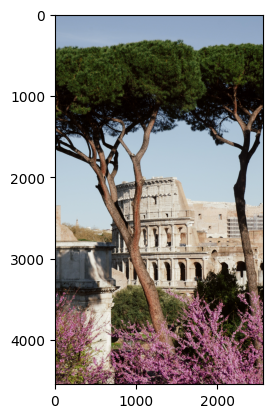

In [ ]:
import matplotlib.pyplot as plt

image = Image.open('/content/photo-1686902738076-b6373a6c2c51?ixlib=rb-4.0.3')

plt.imshow(image)

image = transform(image)
image = image.unsqueeze(0)  # Add a batch dimension

with torch.no_grad():
  features = dinov2_vits14.forward_features(image)
print('image: ',image)
print('features: ', features)

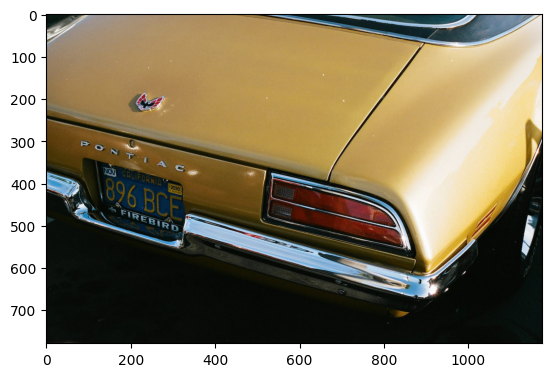

In [ ]:
import requests
from PIL import Image
import io
import matplotlib.pyplot as plt

url = "https://images.unsplash.com/photo-1590505039589-c3f5ddaa299b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1175&q=80"

response = requests.get(url, stream=True)
response.raise_for_status()

image = Image.open(io.BytesIO(response.content))
plt.imshow(image)

In [ ]:
import torch
dinov2_vitg14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitg14')
function_list = dir(dinov2_vitg14)
print(function_list)

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vitg14/dinov2_vitg14_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vitg14_pretrain.pth
100%|██████████| 4.23G/4.23G [01:14<00:00, 61.1MB/s]


['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_backward_pre_hooks', '_buffers', '_call_impl', '_forward_hooks', '_forward_hooks_with_kwargs', '_forward_pre_hooks', '_forward_pre_hooks_with_kwargs', '_get_backward_hooks', '_get_backward_pre_hooks', '_get_intermediate_layers_chunked', '_get_intermediate_layers_not_chunked', '_get_name', '_is_full_backward_hook', '_load_from_state_dict', '_load_state_dict_post_hooks', '_load_state_dict_pre_hooks', '_maybe_warn_non_full_backward_hook', '_modules', '_named_members', '_non_persistent_buffers_set', '_parameters', '_register_load_state_dict_pr

In [ ]:
import io
import requests


url = "https://images.unsplash.com/photo-1590505039589-c3f5ddaa299b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1175&q=80"

response = requests.get(url, stream=True)
response.raise_for_status()

image = Image.open(io.BytesIO(response.content))

image = transform(image)
image = image.unsqueeze(0)  # Add a batch dimension

with torch.no_grad():
  features = dinov2_vitg14.forward(image)
print('image: ',image)
print('features: ', features)

image:  tensor([[[[-1.9295, -1.9124, -1.9124,  ...,  1.4269,  1.4098,  1.2043],
          [-1.9638, -1.9124, -1.9295,  ...,  1.4269,  1.3584,  1.8722],
          [-1.9467, -1.9124, -1.9124,  ...,  1.3070,  1.8550,  1.9407],
          ...,
          [-1.9467, -1.9467, -1.9467,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9638, -1.9467, -1.9295,  ..., -1.9809, -1.9809, -1.9638],
          [-1.9124, -1.8782, -1.8439,  ..., -1.9638, -1.9809, -1.9467]],

         [[-1.4755, -1.4930, -1.4930,  ...,  1.8333,  1.5707,  1.2031],
          [-1.5630, -1.5630, -1.5805,  ...,  1.6408,  1.3081,  1.8859],
          [-1.6155, -1.6331, -1.6155,  ...,  1.2906,  1.9034,  2.0434],
          ...,
          [-1.8256, -1.8256, -1.8081,  ..., -1.8256, -1.8431, -1.8256],
          [-1.8431, -1.8256, -1.8081,  ..., -1.7731, -1.8256, -1.8256],
          [-1.7906, -1.7556, -1.7206,  ..., -1.7381, -1.8081, -1.8256]],

         [[-1.3339, -1.3339, -1.3339,  ...,  2.2391,  1.7337,  1.1062],
          [-1.4210, -1

In [ ]:
import numpy as np
features_np = features.numpy()
print(features_np)

[[ 2.4723501  -0.8299796  -0.25445637 ... -0.5179566   0.85060847
   0.80311775]]


In [ ]:
output_file = 'output.txt'
np.savetxt(output_file, features_np)

In [ ]:
features.size()

torch.Size([1, 1536])

In [ ]:
image.size()

torch.Size([1, 3, 224, 224])

In [ ]:
1536/224

6.857142857142857

In [ ]:
import io
import requests
from PIL import Image
import torch
import torchvision.transforms as T

image = Image.open('1403636579763555584.png')
dinov2_vits14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')

# Define the transformation
transform = T.Compose([
    T.Resize((224, 224)),  # Resize the image to the model's input size
    T.ToTensor(),  # Convert the image to a tensor
])

# Load and transform the image
image = Image.open('1403636579763555584.png')
image = image.convert('RGB')  # Convert grayscale to RGB
image = transform(image)

# Add a batch dimension
image = image.unsqueeze(0)  # Shape: [1, 3, 224, 224]

# Normalize the image
normalize = T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
image = normalize(image)

with torch.no_grad():
    features = dinov2_vits14(image)

#print('image: ', image.shape)
print('features: ', features)

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vitg14/dinov2_vitg14_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vitg14_pretrain.pth
100%|██████████| 4.23G/4.23G [00:56<00:00, 80.3MB/s]


features:  tensor([[ 0.0683, -2.2455, -1.3710,  ..., -1.9187, -0.5894, -0.3920]])


**heat map**

Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main


torch.Size([1, 256, 1024])


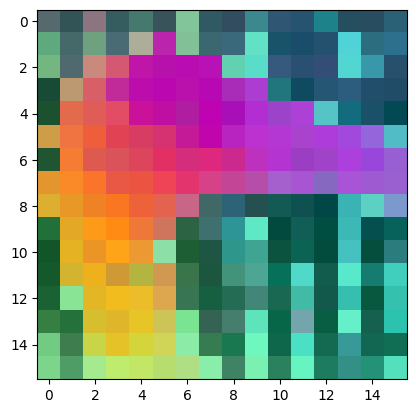

In [7]:
import torch
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Load the DINOv2 model
dinov2_vitl14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14')

# Load and preprocess the input image
img = Image.open('crane4.jpg')
transform = T.Compose([
    T.Resize(224),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.5], std=[0.5]),
])
img = transform(img).unsqueeze(0)

# Extract features from the model
with torch.no_grad():
    features = dinov2_vitl14.forward_features(img)["x_norm_patchtokens"]

print(features.shape)
# Reshape the features array
features = features.view(features.size(0) * features.size(1), -1)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=3)
pca.fit(features)
pca_features = pca.transform(features)

# Normalize the PCA features
pca_features = (pca_features - pca_features.min()) / (pca_features.max() - pca_features.min())
pca_features = pca_features * 255

# Visualize and save the PCA features
plt.imshow(pca_features.reshape(16,16,3).astype(np.uint8))
plt.savefig('test.png')